In [12]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

seed = 0
tf.random.set_seed(seed)

In [13]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [14]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
import os

MODEL_PATH = './model/'

if not os.path.exists(MODEL_PATH):
    os.mkdir(MODEL_PATH)

model_path = MODEL_PATH + '{epoch:02d} - {val_loss:.4f}.h5'


In [16]:
from keras.callbacks import ModelCheckpoint

cb_checkpointer = ModelCheckpoint(
    filepath=model_path,
    monitor='val_loss',
    verbose=1,
    save_best_only=True
)

In [17]:
from keras.callbacks import EarlyStopping

cb_early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10
)

In [18]:
history = model.fit(
    X_train,
    Y_train,
    validation_data=(X_train, Y_train),
    epochs=50,
    batch_size=200,
    verbose=0,
    callbacks=[cb_checkpointer, cb_early_stop]
)


Epoch 1: val_loss improved from inf to 0.14486, saving model to ./model\01 - 0.1449.h5

Epoch 2: val_loss improved from 0.14486 to 0.08775, saving model to ./model\02 - 0.0877.h5

Epoch 3: val_loss improved from 0.08775 to 0.05968, saving model to ./model\03 - 0.0597.h5

Epoch 4: val_loss improved from 0.05968 to 0.04701, saving model to ./model\04 - 0.0470.h5

Epoch 5: val_loss improved from 0.04701 to 0.03345, saving model to ./model\05 - 0.0334.h5

Epoch 6: val_loss improved from 0.03345 to 0.02680, saving model to ./model\06 - 0.0268.h5

Epoch 7: val_loss improved from 0.02680 to 0.02011, saving model to ./model\07 - 0.0201.h5

Epoch 8: val_loss improved from 0.02011 to 0.01525, saving model to ./model\08 - 0.0153.h5

Epoch 9: val_loss improved from 0.01525 to 0.01179, saving model to ./model\09 - 0.0118.h5

Epoch 10: val_loss improved from 0.01179 to 0.00945, saving model to ./model\10 - 0.0095.h5

Epoch 11: val_loss improved from 0.00945 to 0.00776, saving model to ./model\11 - 

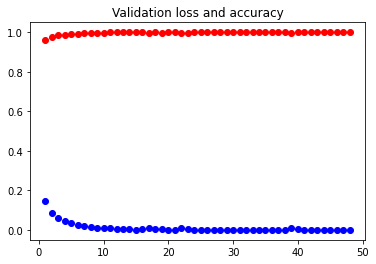

In [19]:
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')

plt.title('Validation loss and accuracy')

plt.show()